Dataset taken from

https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib
%matplotlib inline

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/insurance.csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The following settings will improve the default style and font size of the charts and graphs

In [6]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#000000'

## **Age**
Age is a numeric column, with min age = 18, and max age = 64, thus we can visualize the distribution of age using histogram with 47 bins (one for each year) and a box plot.

In [7]:
df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [8]:
fig = px.histogram(df, x='age', marginal='box', nbins=47, title='Distribution of age')
fig.update_layout(bargap=0.1)
fig.show()

The distribution of ages in the dataset are almost uniform, with 20-30 customers of every ages, except for age 18 and 19.

## **Body Mass Index (BMI)**

In [9]:
fig = px.histogram(df, x='bmi', marginal='box', color_discrete_sequence=['red'], title='Distribution of BMI')
fig.update_layout(bargap=0.1)
fig.show()

## **Charges**

This is the column we are trying to predict. Let's use columns 'smokers' to distinguish charges for 'smokers' and 'non-smokers'.

In [10]:
fig = px.histogram(df, x='charges', color='smoker', marginal='box', color_discrete_sequence=['green', 'grey'], title="Annual medical charges")
fig.update_layout(bargap=0.1)
fig.show()

In [11]:
fig = px.histogram(df, x='charges', color='sex', marginal='box', color_discrete_sequence=["blue","cyan"])
fig.update_layout(bargap=0.1)
fig.show()

We can conclude that the median charges of male and female are approx same

In [12]:
fig = px.histogram(df, x='charges', color='region', marginal='box', color_discrete_sequence=["brown", "pink", "orange", "yellow"])
fig.update_layout(bargap=0.1)
fig.show()

This is graph for the region wise charges

## **Smoker**

In [13]:
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [14]:
# sex wise count of smokers
px.histogram(df, x='smoker', color='sex', title="Smoker")

In [15]:
# region wise count of smokers
px.histogram(df, x='smoker', color='region', title="Smokers in different regions")

In [16]:
px.histogram(df, x='smoker', color='children', title="count of children of smokers")

## Age and Charges

Let's visualize the relation between age and charges, using scatter plot. Each point in scatter plot, represents one customer.

In [17]:
fig = px.scatter(df, x='age', y='charges', color='smoker', opacity=0.8, hover_data=["sex"], title="Age vs  Charges")
fig.update_traces(marker_size=5)
fig.show()

We can observe that the medical charges increase as the age increases, in most cases. But as we can see, age alone can't be used to determine the medical charges.

## **Bmi and Charges**

In [18]:
fig = px.scatter(df, x='bmi', y='charges', color='smoker', opacity=0.7, hover_data=['sex'], title='BMI vs Charges')
fig.update_traces(marker_size=5)
fig.show()

For non-smokers, the bmi field doesn't seem to be quite related to increase in the charges, as the charges at any bmi are almsot same for non-smokers.

However, for the smokers' with bmi>30, there's a drastic increase in the medical expenses.

In [19]:
fig = px.histogram(df, x='region', y='charges', color='smoker', title='Region vs Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [20]:
fig = px.violin(df, x='children', y='charges', title='children vs Charges')
fig.show()

## **Correlation**

In [21]:
df.charges.corr(df.age)

0.2990081933306476

In [22]:
df.charges.corr(df.bmi)

0.19834096883362895

In [23]:
smoker_values = {'no':0, 'yes':1}
smoker_numeric = df.smoker.map(smoker_values)
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [24]:
df.charges.corr(smoker_numeric)

0.787251430498478

In [25]:
df.select_dtypes(include=[np.number]).corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'correlation matrix')

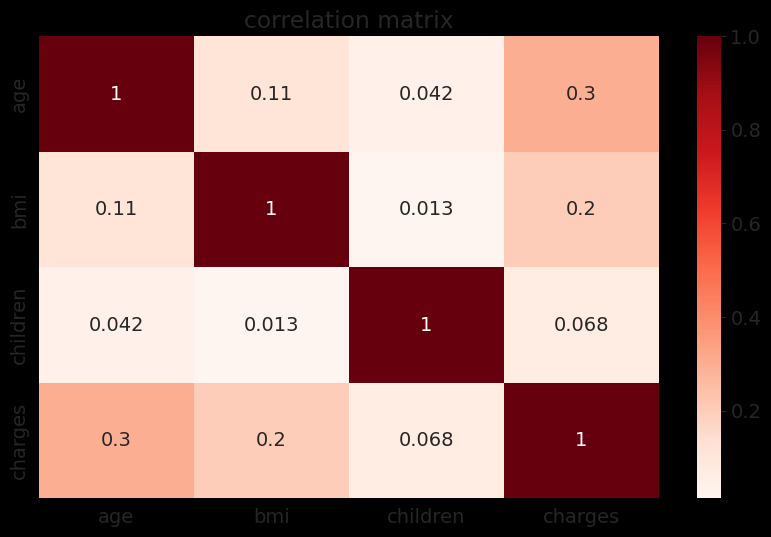

In [26]:
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), cmap="Reds", annot=True)
plt.title("correlation matrix")

## **Linear Regression using a single feature**

In [27]:
non_smoker_df = df[df.smoker == 'no']

In [28]:
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


<Axes: title={'center': 'Age vs Charges'}, xlabel='age', ylabel='charges'>

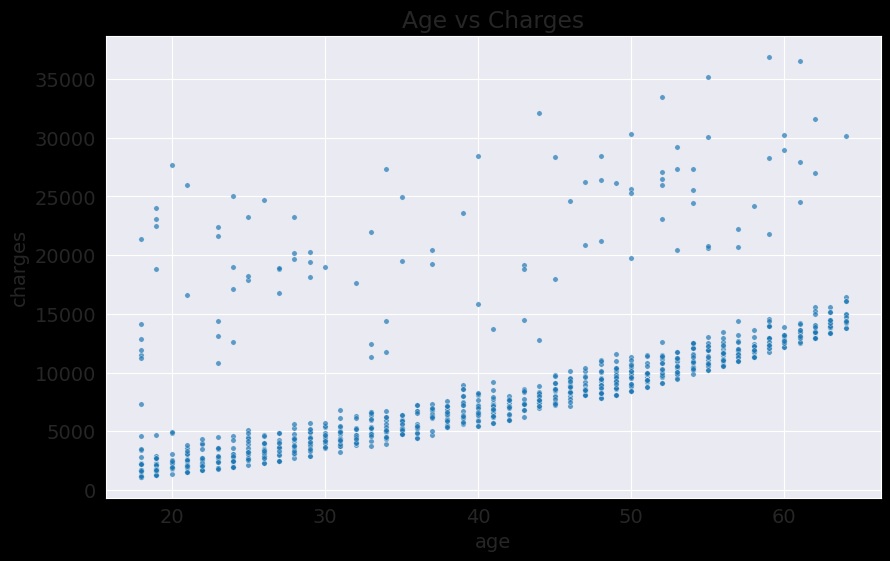

In [29]:
plt.title("Age vs Charges")
sns.scatterplot(non_smoker_df, x='age', y='charges', alpha=0.7, s=15)

In [30]:
# let's take an estimate charge function
def estimate_charge(age, w, b):
  return w*age+b

In [31]:
w=50
b=100

In [32]:
ages = non_smoker_df.age
estimated_charges = estimate_charge(ages, w, b)

Text(0, 0.5, 'estimated charges')

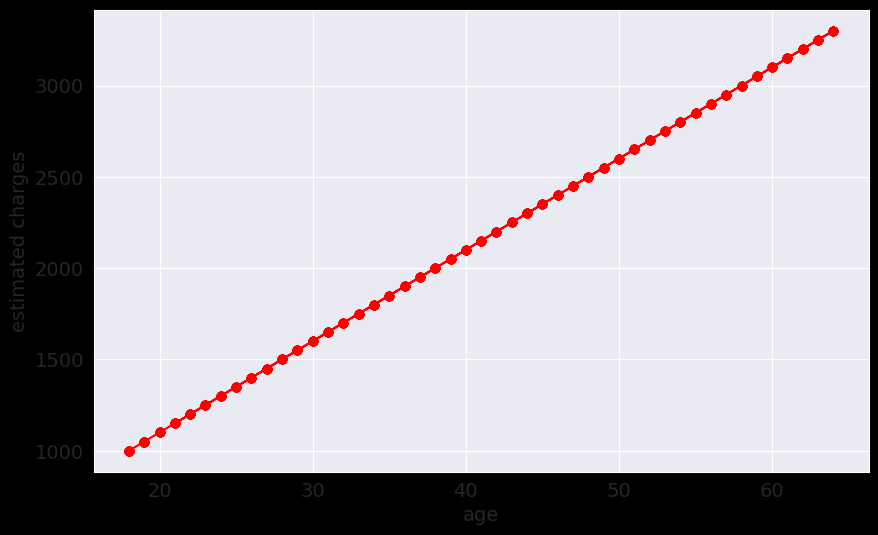

In [34]:
plt.plot(ages, estimated_charges, 'r-o')
plt.xlabel("age")
plt.ylabel("estimated charges")

As expected, it formed a straight line, as we had assumed the static values of w and b

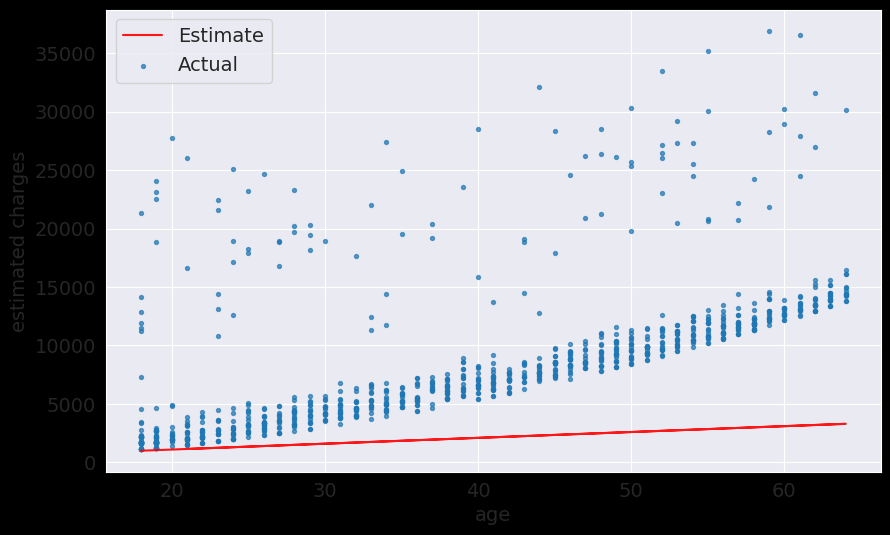

In [37]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9)
plt.scatter(ages, target, s=8, alpha=0.7)
plt.xlabel("age")
plt.ylabel("estimated charges")
plt.legend(['Estimate', 'Actual'])

In [38]:
def try_parameters(w, b):
  ages = non_smoker_df.age
  target = non_smoker_df.charges

  estimated_charges = estimate_charge(ages, w, b)

  plt.plot(ages, estimated_charges, 'r', alpha=0.8)
  plt.scatter(ages, target, s=8, alpha=0.8)
  plt.xlabel('Age')
  plt.ylabel("Charges")
  plt.legend(["Estimate", "Actual"])

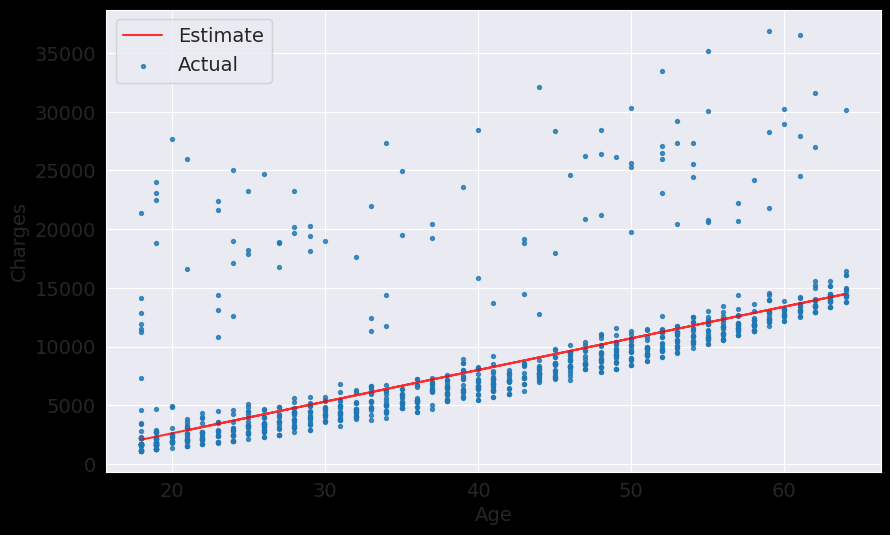

In [62]:
try_parameters(270, -2800)

In [63]:
target = non_smoker_df.charges
target

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [65]:
predictions = estimated_charges
predictions

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [66]:
def rmse(target, predictions):
  return np.sqrt(np.mean(np.square(target-predictions)))

In [67]:
w=50
b=100

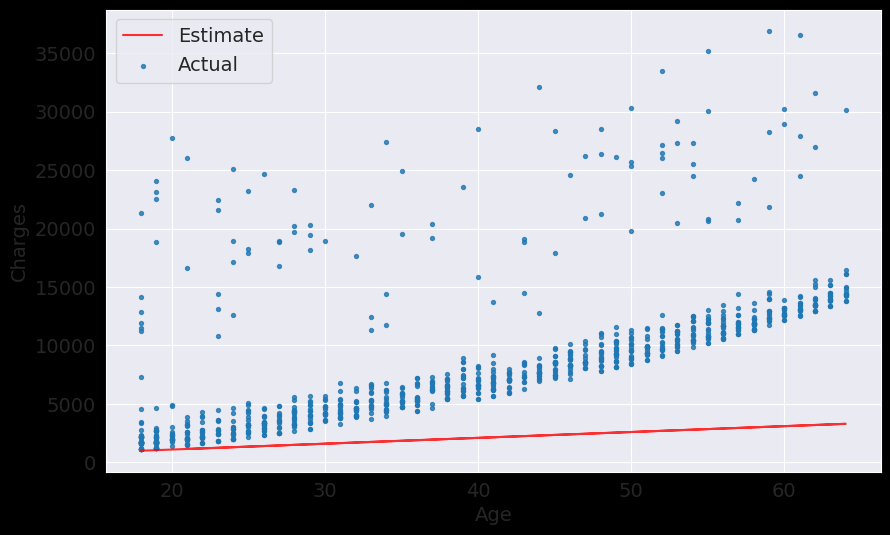

In [68]:
try_parameters(w, b)

In [73]:
# target
# predictions

In [74]:
rmse(target, predictions)

8461.949562575493

Here, we can say that our each and every element's prediction differs to actual one by $8461

In [75]:
def try_parameters(w, b):
  ages = non_smoker_df.age
  target = non_smoker_df.charges

  predictions = estimate_charge(ages, w, b)

  plt.plot(ages, predictions, 'r', alpha=0.8)
  plt.scatter(ages, target, s=8, alpha=0.8)
  plt.xlabel('Age')
  plt.ylabel("Charges")
  plt.legend(["Predictions", "Actual"])

  loss = rmse(target, predictions)
  print("RMSE loss: ",loss)

RMSE loss:  4673.508821970761


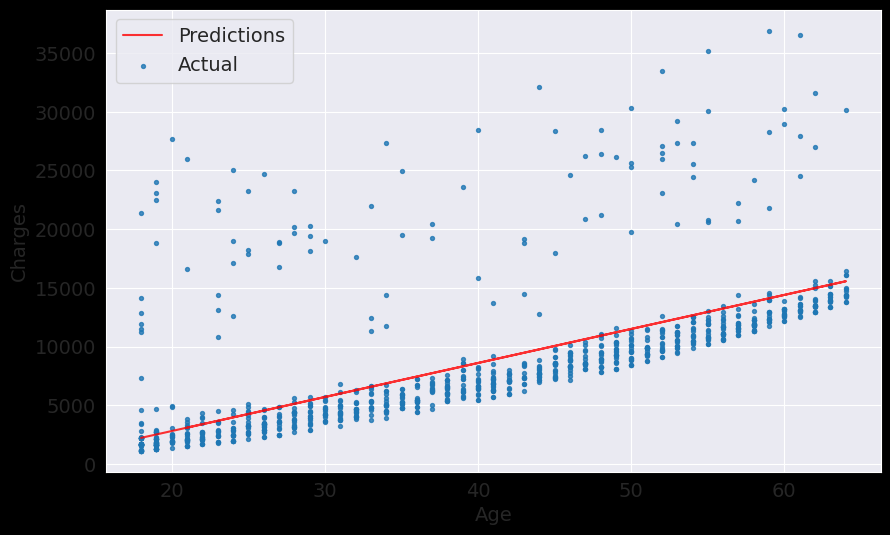

In [92]:
try_parameters(290, -3000)

In [93]:
from sklearn.linear_model import LinearRegression

In [94]:
model = LinearRegression()

In [95]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [97]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges

print("inputs shape: ", inputs.shape)
print("targets shape: ", targets.shape)

inputs shape:  (1064, 1)
targets shape:  (1064,)


In [98]:
model.fit(inputs, targets)

LinearRegression()

In [102]:
model.predict(np.array([[23], [35], [67]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7262.29139253, 15814.25660313])

In [103]:
model.predict(inputs)

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

Now, the rmse loss is around $4660, which is much less compared to what we were getting previously. Also, because of the outliers, it is difficult to predict very accurately, so this is the best case scenerio for this dataset.


Now, we can also find the values of w and b, at which it created the best fit line.

In [109]:
# w
model.coef_

array([267.24891283])

In [108]:
# b
model.intercept_

-2091.4205565650864

RMSE loss:  4662.505766636395


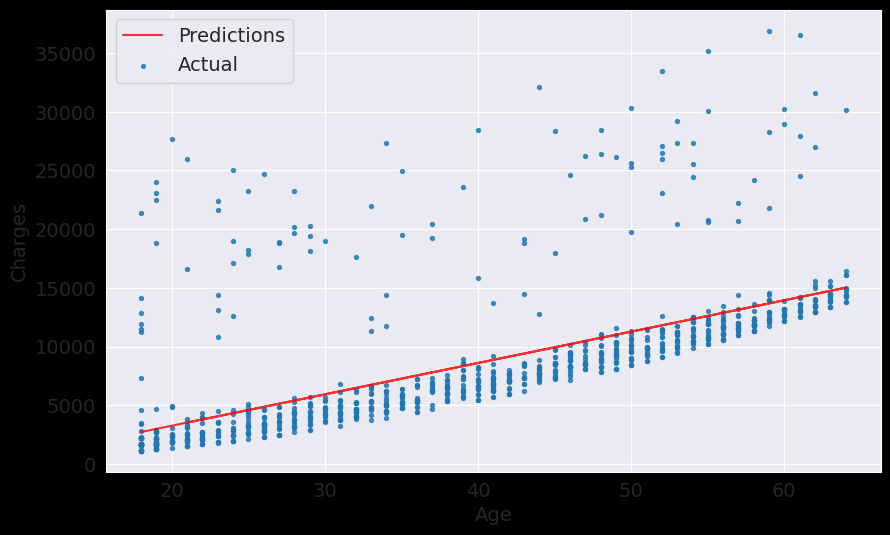

In [110]:
try_parameters(model.coef_, model.intercept_)

Here, we can say that the line which is created and assumed as the best fit line, is pretty accurate, considering the fact that there are so many outliers, so we had to adjust the line accordingly.

In [112]:
smoker_df = df[df.smoker == 'yes']

In [113]:
smoker_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


In [116]:
input1 = smoker_df[['age']]
target1 = smoker_df.charges

print("input shape: ", input1.shape)
print("target shape: ", target1.shape)

input shape:  (274, 1)
target shape:  (274,)


In [117]:
model.fit(input1, target1)

LinearRegression()

In [118]:
model.predict(np.array([[23], [35], [67]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([27314.59297544, 30977.44420076, 40745.04746827])

In [119]:
model.predict(input1)

array([26093.642567  , 39218.85945773, 28535.54338388, 29451.25619021,
       30672.20659865, 29756.49379232, 27009.35537333, 28840.78098599,
       30977.44420076, 38608.38425351, 31282.68180287, 34945.53302819,
       31282.68180287, 37997.90904929, 25788.40496489, 36471.72103874,
       26398.88016911, 28840.78098599, 28535.54338388, 27009.35537333,
       31587.91940498, 34029.82022186, 37692.67144718, 38303.1466514 ,
       39829.33466195, 37387.43384507, 31893.15700709, 38913.62185562,
       26398.88016911, 39524.09705984, 29146.0185881 , 33724.58261975,
       26093.642567  , 30061.73139443, 30672.20659865, 29451.25619021,
       34335.05782397, 33114.10741553, 34945.53302819, 25788.40496489,
       29451.25619021, 33114.10741553, 25788.40496489, 39524.09705984,
       31282.68180287, 28535.54338388, 30977.44420076, 26093.642567  ,
       33114.10741553, 32503.63221131, 26093.642567  , 27314.59297544,
       39524.09705984, 25788.40496489, 39524.09705984, 36776.95864085,
      

In [121]:
# w for smokers
model.coef_

array([305.23760211])

In [122]:
# b for smokers
model.intercept_

20294.128126915966